In [1]:
cd /content/drive/My Drive/Reverse Image Search

/content/drive/My Drive/Reverse Image Search


In [14]:
import pickle
import cv2
from scipy.spatial.distance import cosine
import numpy as np
import matplotlib.pyplot as plt


In [3]:
features=pickle.load(open('features.pkl','rb+'))

In [4]:
model=pickle.load(open('model.pkl','rb+'))

Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/keras/engine/saving.py:341: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


In [5]:
path=pickle.load(open('path.pkl','rb+'))

In [18]:
path

['__opt__aboutcom__coeus__resources__content_migration__mnn__images__2019__04__oranges_pith_peels-0fe5ff335016464e878db92d02d9f5ab.jpg',
 '_109958326_apples.jpg',
 '_85500702_bunch-of-seven-think-976.jpg',
 '_87476613_4d8eea22-7691-48e3-b522-fdc555433e87.jpg',
 '_97265525_20616979_10155064962591026_6934617954464082233_o.jpg',
 '_c62d39de-43bc-11e8-a5d3-1ef93e3dfeed.jpg',
 '_cdbf52fa-5a63-11e8-b431-73159b4b09e2.jpg',
 '0018603_food-festival-pineapples-tropical-pineapple-fruit-cotton-fabric_600.jpeg',
 '001-PINEAPPLE_grande.jpg',
 '0035804_paraman-food-works-orange-fruit-powder.png',
 '01-Bananas.jpg',
 '0-3242_clip-art-orange-clipart-orange-clip-art-png.png',
 '05795a16b647118ffb6629390e995adb.jpg',
 '10_health_and_wellness_benefits_of_strawberries_Story_Page.jpeg',
 '100-6383ssd-futaba-original-imafdpqqhhpcn6eq.jpeg',
 '104-1048962_fruit-orange-slice-png-transparent-orange-fruit-slice.png',
 '108-1088525_orange-fruits-png-transparent-png.png',
 '108633553-orange-vector-icon-isolated-on

In [8]:
def img_preprocessing(img):
  image=img
  image=cv2.resize(image,(224,224))
  image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
  image=image/255
  return image


  

In [10]:
def cosinesimilarity(features,query_feature):
  cosine_distance=[]
  ii=0
  for i in features:
    dis=cosine(query_feature,i)
    cosine_distance.append([dis,ii])
    ii=ii+1
  cosine_similarity=sorted(cosine_distance)
  return cosine_similarity



In [55]:
def main():
  img=cv2.imread('/content/71deXpKg63L._SL1200_.jpg')
  image=img_preprocessing(img)
  query_feature=model.predict(np.array([image]))
  cosine_similarity=cosinesimilarity(features,query_feature)
  plt.imshow(img)
  plt.show()
  for i in cosine_similarity[:10]:
    im=cv2.imread('images/'+path[i[1]])
    im=cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
    plt.imshow(im)
    plt.show()

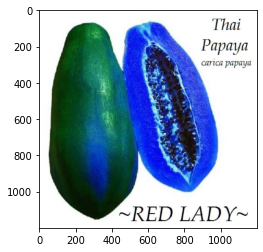

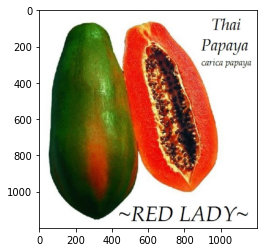

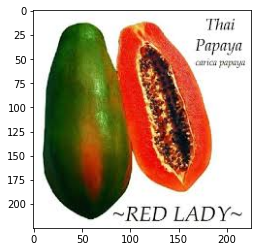

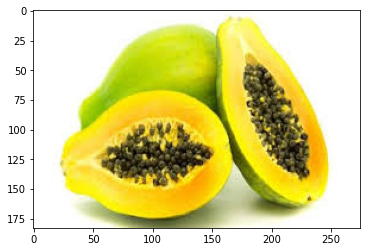

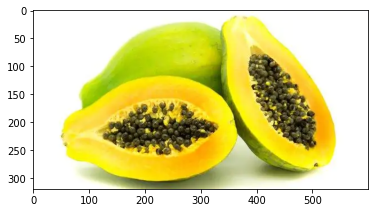

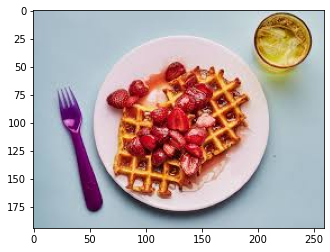

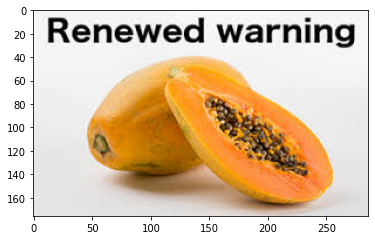

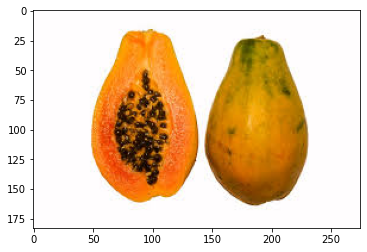

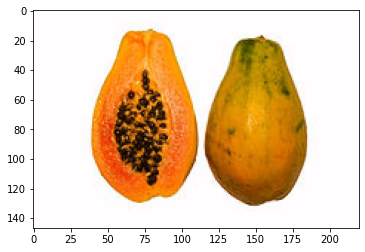

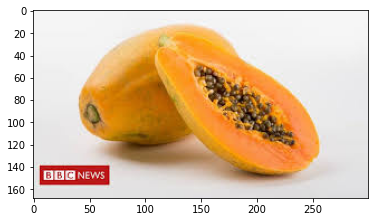

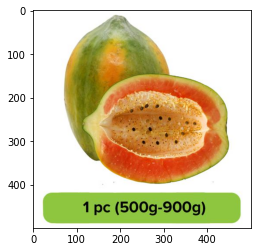

In [56]:
main()